# 1. SYRIATEL CHURN PREDICTION

## 1.1. Business Understanding
SyriaTel is a telecommunications company that provides services such as voice calls, messaging, and data plans to a wide range of customers. Like many telecom providers, its business relies heavily on maintaining a stable base of long-term subscribers. Customer loyalty is therefore crucial as steady usage over time generates predictable revenue and reduces the high costs of constantly getting new users.

Customer churn has long been a challenge for the telecommunications industry, and SyriaTel is no exception. Churn refers to the rate at which customers discontinue their service, either by switching to a competitor or by simply stopping usage altogether. For telecom companies, churn is costly since acquiring a new customer is usually more expensive than retaining an existing one.

This project seeks to identify customers at high risk of churn. With these insights, SyriaTel can implement retention strategies to keep valuable customers engaged.

### 1.1.1. Problem statement
SyriaTel is losing a portion of its customers to churn, which directly impacts profitability. However, the company lacks a clear framework to identify which customers are most at risk of leaving. Without this knowledge, SyriaTel cannot act proactively to retain these customers. This project aims to develop a predictive model that will identify customers likely to churn or notify before they leave.

### 1.1.2. Objectives
1. To identify the factors that significantly influence churn.
2. To build and validate a predictive model that classifies whether a customer is likely to churn.
3. To determine how much revenue is lost due to customer churn.
4. To provide insights that SyriaTel can use in customer retention strategies.

### 1.1.3. Metric of Success

1. The project will be considered successful if it leads to:
* lower churn rate, meaning fewer customers discontinue their subscriptions.
* higher customer retention rate, with more customers choosing to stay with SyriaTel for longer periods.
* Enhanced customer experience, as the company acts on insights from the model to resolve common pain points.
2. From a technical perspective, the model should achieve an overall accuracy above 75% and a recall above 70% for churn prediction, since recall is critical to correctly identifying customers at risk of leaving.

## 1.2. Data understanding
The dataset consists of customer information collected by SyriaTel. Each row represents a single customer, and the columns describe their usage, subscription plans, and service interactions. The target variable is churn, which indicates whether the customer left the company or stayed.

**Columns:**
* state : The U.S. state where the customer is located. 
* account length : The number of days a customer has had their account. 
* area code : The customer’s area code.
* phone number : Each customer’s phone number (unique identifier).
* international plan : Whether the customer has subscribed to an international calling plan (yes or no). 
* voice mail plan : Whether the customer has subscribed to a voicemail plan. 
* number vmail messages : Number of voice mail messages received by the customer. 
* total day minutes : Total minutes used by the customer during daytime.
* total day calls : Total number of calls made during daytime.
* total day charge : Total charges incurred during daytime.
* total eve minutes : Total minutes used during evening hours.
* total eve calls : Total number of calls made during evening hours.
* total eve charge : Total charges incurred during evening hours.
* total night minutes : Total minutes used during night hours.
* total night calls : Total number of calls made during night hours.
* total night charge : Total charges incurred during night hours.
* total intl minutes : Total international minutes used.
* total intl calls : Number of international calls made.
* total intl charge : Total charges from international calls.
* customer service calls : Number of times the customer called customer service. 
* churn : The target variable (True if the customer churned, False if they stayed). 

In [1]:
# Import the libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# load the  data
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Check the tail
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Observation: the dataset values are uniform from top to bottom

## 1.2.1. Data Relevance
The dataset is relevant for churn prediction because it is complete, contains a clear target variable (churn), and provides multiple features that capture customer behavior and service usage

In [4]:
# Check the structure of the data set
print(f" The dataset has {data.shape[0]} records and {data.shape[1]} columns")

 The dataset has 3333 records and 21 columns


In [5]:
#concise stat summary
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Observation: At the top we see that all numerical columns have 3,333 entries, confirming there are no missing values in numeric data.
The avaerage length or number of days a customer has an account is roughly 101 days, with the minimum being 1 day and the maximum being 243 days.

In [6]:
# check stat summary for categorical columns
data.describe(include='object').T[['top', 'freq']]

,top,freq
state,WV,106
phone number,382-4657,1
international plan,no,3010
voice mail plan,no,2411


Observation: Most of the customers do not subscribe to either the international plan or the voice mail plan, suggesting these services are less popular among the customer base

In [7]:
#check unique values
for coln in data:
    uni_vale = data[coln].unique()
    print(f" {coln}\n, {uni_vale}\n")

 state
, ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

 account length
, [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 13

## 1.3. Data Preparation

### 1.3.1. Data Cleaning

In [8]:
# Make a copy
data1 = data.copy(deep=True)

In [9]:
# Check the null values
data1.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
#check duplicates
data1.duplicated().sum()

0

Observation: The data is clean and complete with no missing vlues or duplicates.

In [11]:
# Drop unnecessary columns
data1 = data1.drop(columns=[
    'phone number', 
    'area code'])
data1.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We dropped phone number as it is not useful in modelling and areacode because it just gave the codes for the state.

In [12]:
# Check data types
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

We need to convert the column Churn from Boolean to an integer.

In [13]:
data1['churn'] = data1['churn'].astype('int64')

In [14]:
# confirm the data type again 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

Observation: The dataset comprises of 17 numerical and 4 categorical columns

## 1.4. Exploratory Data Analysis

### 1.4.1. Univariate Analysis

In [15]:
# identifying categorical columns
categorical_coln= data1.select_dtypes(include=["object", "category"]).columns
categorical_coln

Index(['state', 'international plan', 'voice mail plan'], dtype='object')

In [16]:
# identifying numerical columns
numerical_coln = data1.select_dtypes(include=['int64', 'float64']).columns
numerical_coln

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

**Observation:**
The dataset contains both categorical and numerical features. Separating these columns will make the EDA process easier 

In [17]:
# checking for class distribution
data1["churn"].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

Text(0.5, 1.0, 'Churn Distribution')

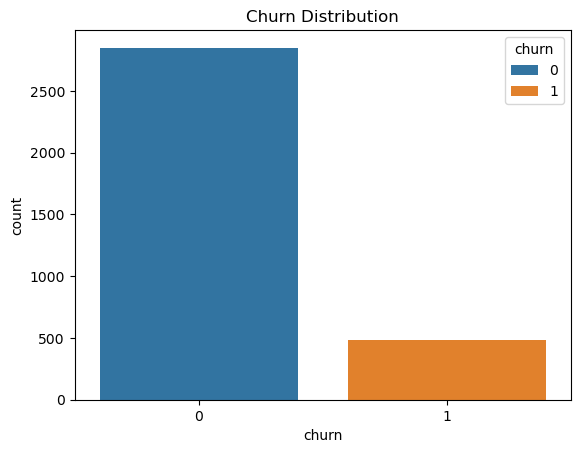

In [18]:
#visualize churn distribution
sns.countplot(x='churn', data= data1, hue='churn')
plt.title("Churn Distribution")

**Observation:** 

Most of the customers did not churn, confirming the dataset is imbalanced. Out of 3,333 customers, the majority remained 2,850 (85.5%), while only 483 (14.5%) decided to leave.


**Modeling takeaway:**

Accuracy on its own isn’t sufficient for evaluation.

Metrics such as recall, precision, F1-score, and ROC-AUC give a more balanced picture.

To counter the imbalance, methods like adjusting class weights or using oversampling/undersampling should be considered.

**Business perspective:**

A churn level of around 15% is notable.

Reducing churn, even marginally, could save a substantial amount of revenue, making retention initiatives highly valuable.

Text(0.5, 1.0, 'Churn by Number of Service Calls')

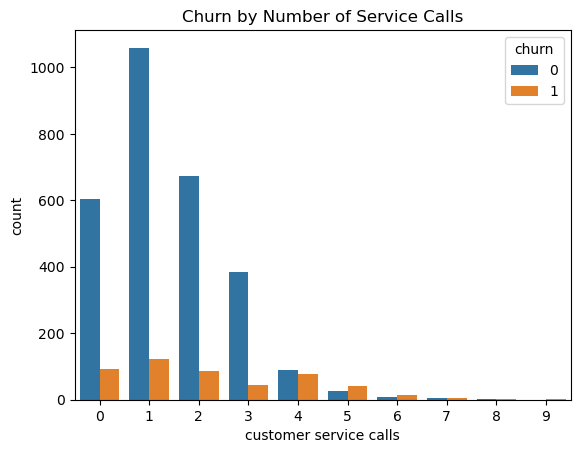

In [19]:
# Distribution of Customer Service calls
sns.countplot(x='customer service calls', hue='churn', data=data1)
plt.title("Churn by Number of Service Calls")

Observation: Most customers make less than 3 calls, a few make more.

Text(0, 0.5, 'Number of Customers')

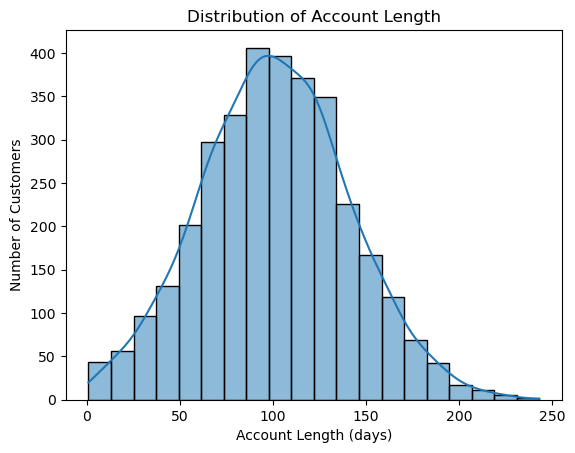

In [20]:
# Account length distribution
sns.histplot(data1['account length'], bins=20, kde=True)
plt.title("Distribution of Account Length")
plt.xlabel("Account Length (days)")
plt.ylabel("Number of Customers")

Observation: Account length is fairly spread out, with no strong clustering.

### 1.4.2. Bivariate Analysis

#### Categorical features vs Churn

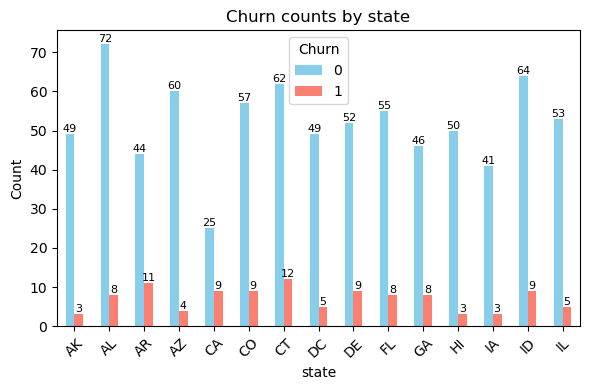

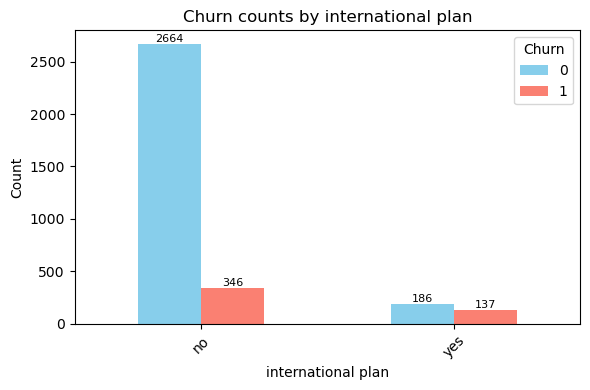

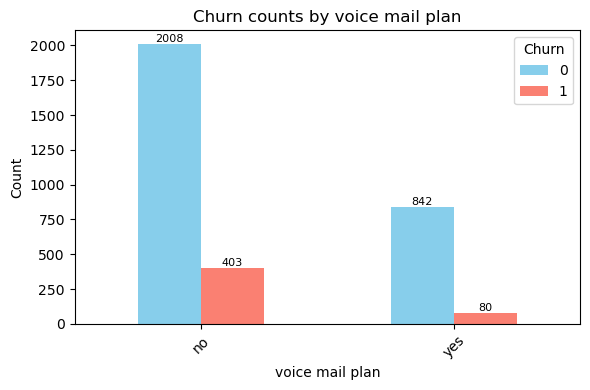

In [21]:
for coln in categorical_coln:
    # Create crosstab of churn vs feature
    churn_counts = pd.crosstab(data1[coln], data1['churn'])

    # Limit to top 15 categories if too many (like 'state')
    if len(churn_counts) > 15:
        churn_counts = churn_counts.head(15)

    # Plot
    ax = churn_counts.plot(kind='bar', figsize=(6,4), color=['skyblue', 'salmon'])

    # Add labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8)

    plt.title(f"Churn counts by {coln}")
    plt.xlabel(coln)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()

**Observation:**
**1. State vs Churn**

Customers are spread evenly across states, but churn is not concentrated in one particular state.

While some states (e.g. WV, NJ, TX) show slightly higher churn counts, this does not indicate a strong geographic pattern.

This suggests that state is not a dominant factor influencing churn.

**2. International Plan vs Churn**

Customers with an International Plan have a much higher churn rate compared to those without.

Even though only a minority of customers subscribe to the plan, the churn proportion is significantly higher among them.

This points to dissatisfaction with international call costs or service quality as a potential churn driver.

**3. Voice Mail Plan vs Churn**

Customers with a Voice Mail Plan tend to churn less compared to those without it.

This suggests that the voicemail service may add perceived value and satisfaction, helping retain customers.


**Business Insight**

International Plan: Customers with an international plan show significantly higher churn. This indicates the pricing or quality of international services may not be competitive. Reviewing plan costs, call quality, or offering discounts could improve retention.

Voice Mail Plan: Churn rates are lower among customers with voicemail. This feature seems to increase customer retention, suggesting value-added services can help retention.

State: Certain states have higher churn concentrations. This means churn is influenced by regional factors such as local competitors, pricing, or marketing reach. Tailored state-specific campaigns could address this.

#### Numerical features by Churn

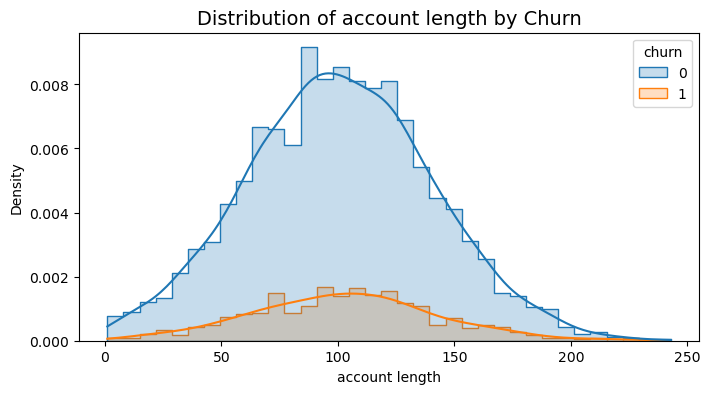

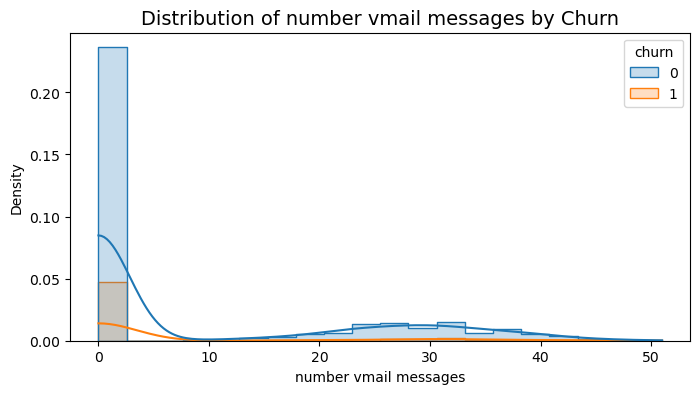

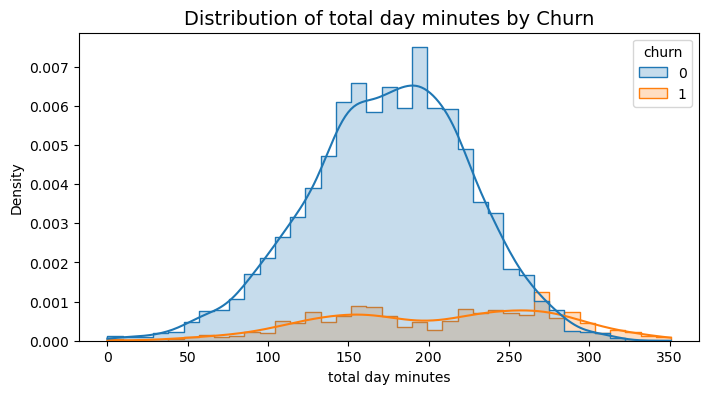

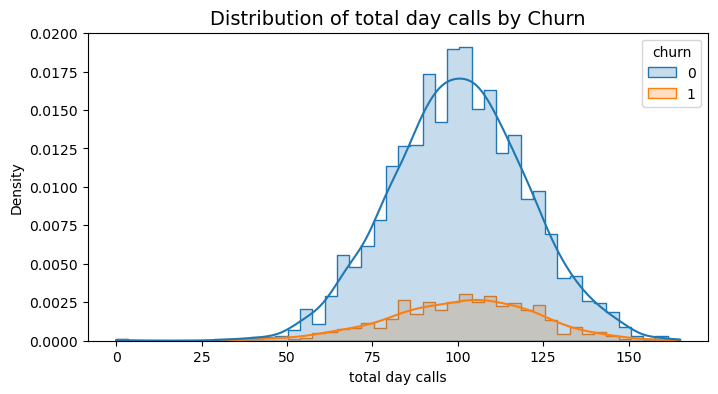

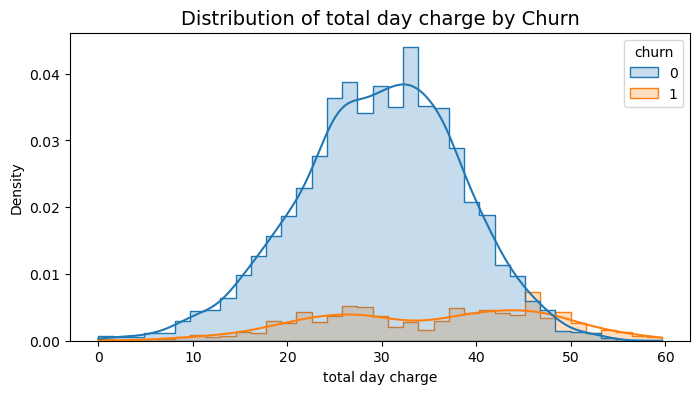

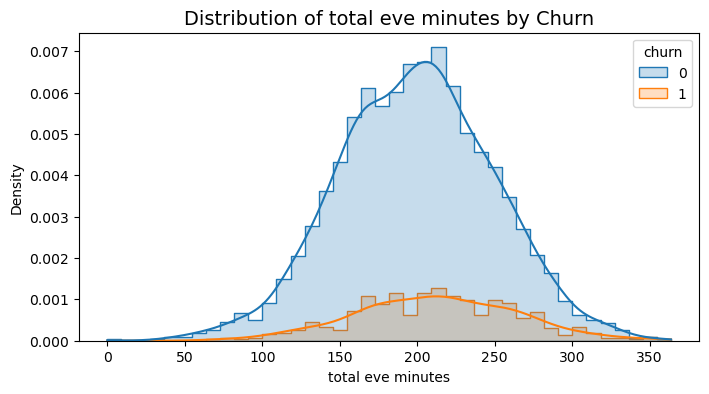

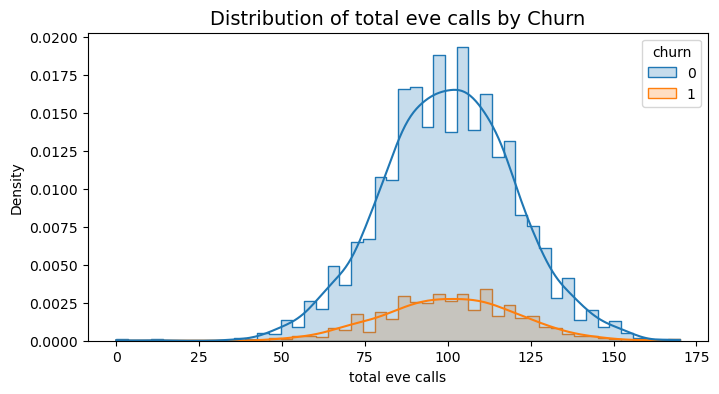

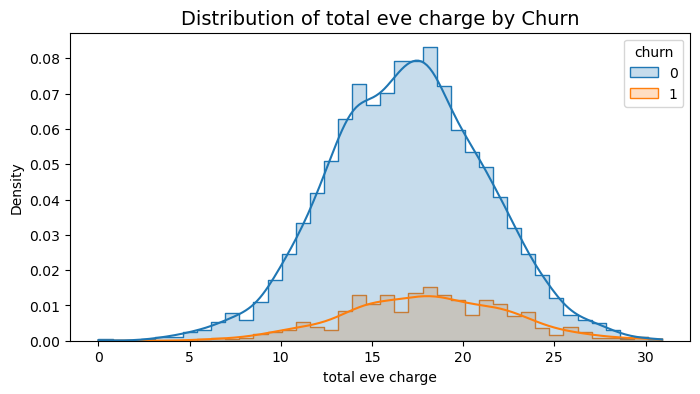

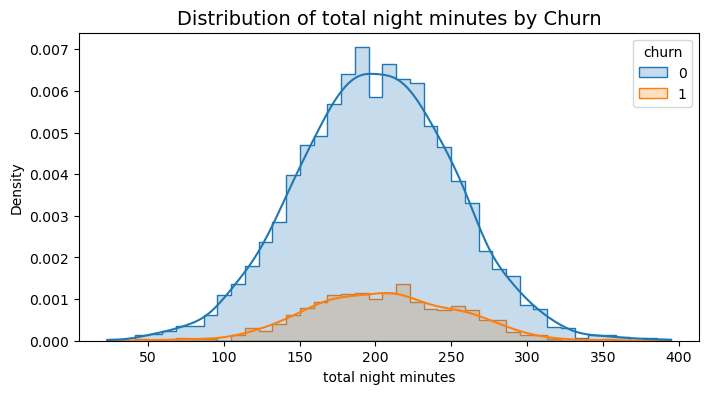

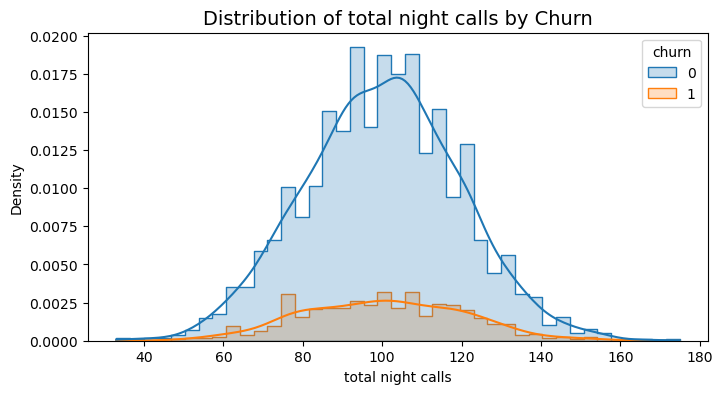

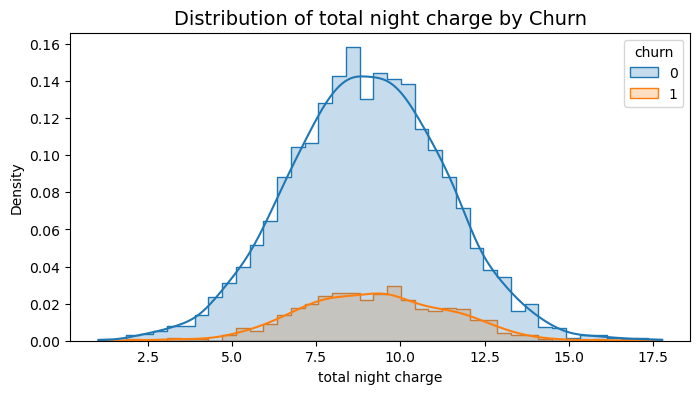

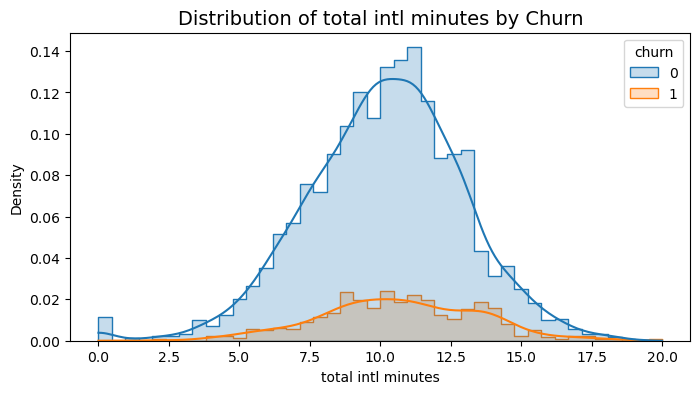

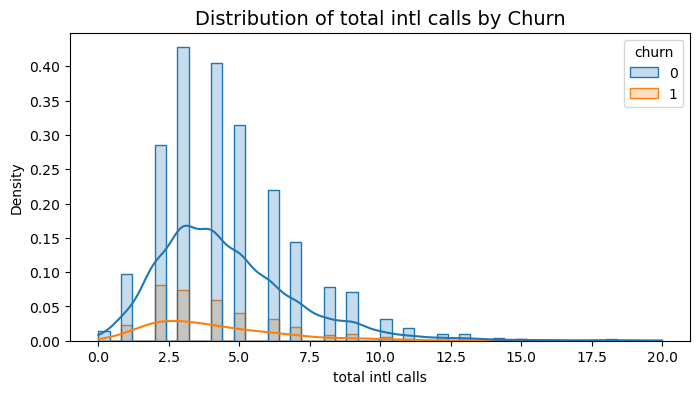

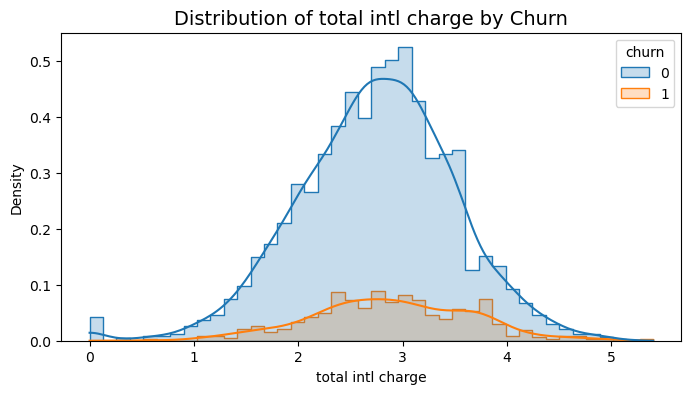

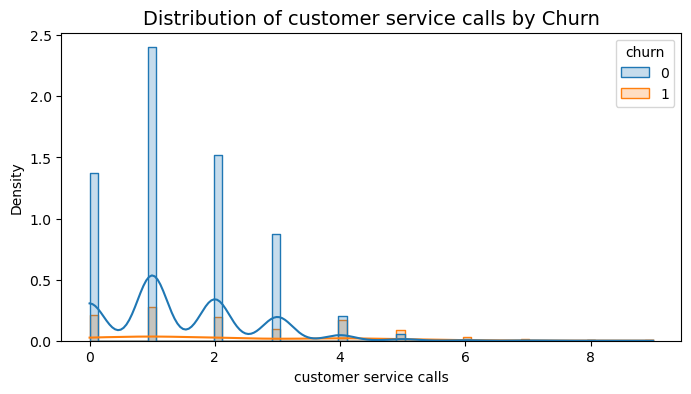

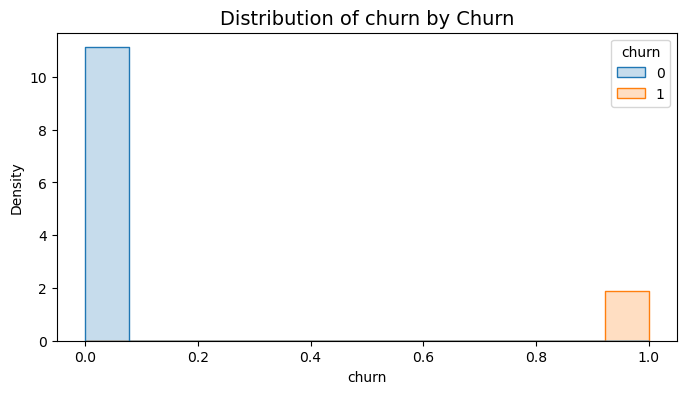

In [22]:
# Histogram: Numerical features vs Churn
for coln in numerical_coln:
    plt.figure(figsize=(8,4))
    sns.histplot(data=data1, x=coln, hue="churn", kde=True, stat="density", element="step")
    plt.title(f"Distribution of {coln} by Churn", fontsize=14)
    plt.xlabel(coln)
    plt.ylabel("Density")
    plt.show()

**Observation:**
  
**1. Account Length**

The distribution is fairly uniform with no clear concentration in any range.

This suggests that account tenure does not have a strong standalone effect on churn.

**2. Voice Mail Messages**

The distribution is heavily skewed toward 0 messages, meaning most customers do not use voicemail services.

A small proportion of customers subscribe to voicemail heavily, but these are outliers.

This could mean voicemail usage is not a primary churn driver.

**3. Day, Evening, and Night Minutes**

Day Minutes: This feature is more spread out, with customers distributed across a wider range of call usage. Heavy daytime usage may correlate with churn.

Evening Minutes: Most customers cluster in the mid-range of usage, showing evening calls are common but less varied.

Night Minutes: Distribution is relatively balanced with a peak around average usage.

**4. International Minutes**

The distribution is skewed towards lower usage, meaning most customers rarely make international calls.

Only a small minority are high users of international minutes.

**5. Customer Service Calls**

There is a visible spike after the first call, with notable peaks at 1 and 4 calls.

This suggests that increased interaction with customer service may indicate dissatisfaction and could be a strong churn predictor.

**Business Insight**

High day minutes and charges are linked to churn, showing heavy daytime users may perceive costs as too high.

Customer service calls are another strong churn signal. This just means that more calls often mean unresolved issues.

Customers who have been with the company longer churn less, pointing to some loyalty effect.

### 1.4.3. Multivariate analysis

<Figure size 1000x500 with 0 Axes>

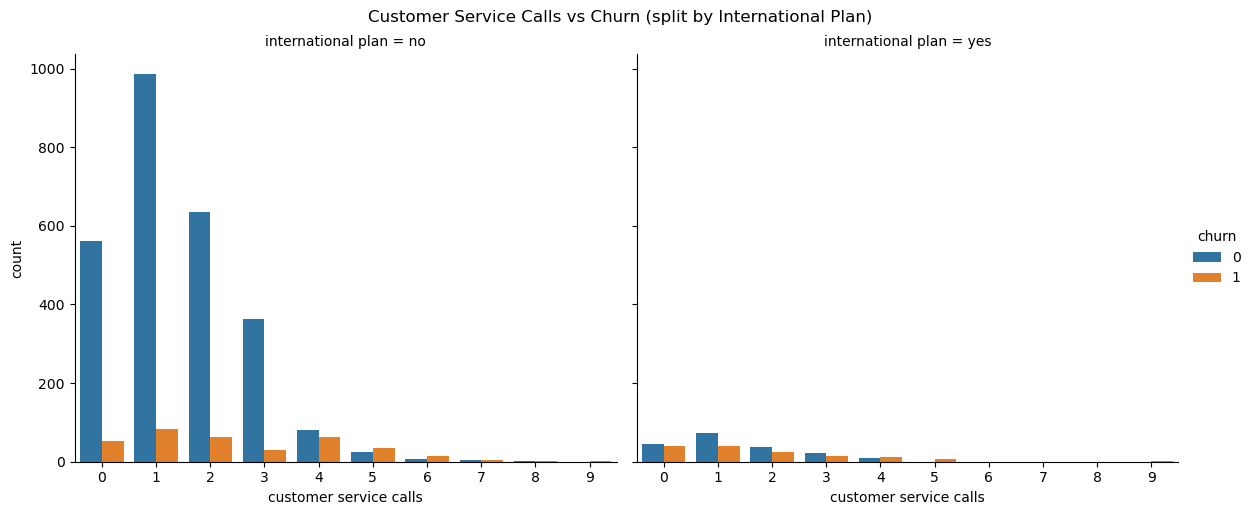

In [27]:
# International plan x Customer service calls x Churn
plt.figure(figsize=(10,5))
sns.catplot(
    data=data1, 
    x='customer service calls', 
    hue='churn', 
    col='international plan', 
    kind='count',
    height=5, 
    aspect=1.2
)
plt.suptitle("Customer Service Calls vs Churn (split by International Plan)", y=1.02)
plt.show()

Observation: When split by international-plan status, customers with an international plan and multiple service calls show noticeably higher churn counts.

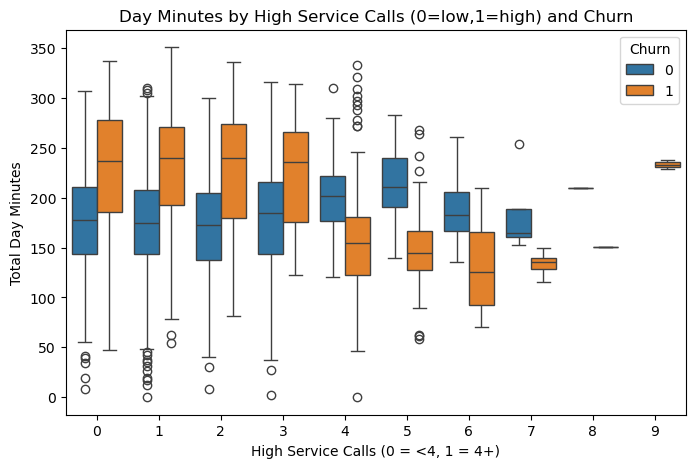

In [28]:
# Day minutes distribution by high_service_calls and churn
plt.figure(figsize=(8,5))
sns.boxplot(
    data=data1, 
    x='customer service calls',   
    y='total day minutes',
    hue='churn'
)
plt.title("Day Minutes by High Service Calls (0=low,1=high) and Churn")
plt.xlabel("High Service Calls (0 = <4, 1 = 4+)")
plt.ylabel("Total Day Minutes")
plt.legend(title="Churn")
plt.show()

**Observation:**

Customers flagged with high_service_calls (4+) show wider spread in day minutes, and a larger share of churn within that group.

This indicates that both high usage and repeated service contacts together are correlated with churn.